In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
dataset = pd.read_csv('consumo_cerveja.csv')
dataset.head(2)

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,mes,dia_semana,dia
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1,3,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1,4,2


In [38]:
consumo = dataset.groupby('dia_semana')['Consumo_de_cerveja_litros'].mean()
consumo_du = consumo[consumo.index < 5]
consumo_fs = consumo[consumo.index > 4]
consumo.index = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
type(consumo_du)

pandas.core.series.Series

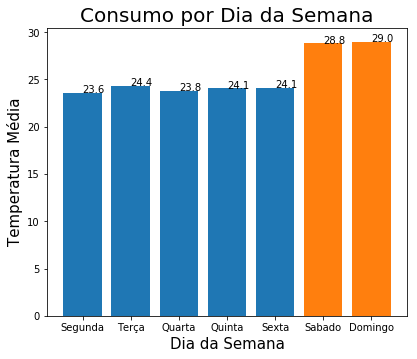

In [46]:
fig = plt.figure(figsize=(5,4))
eixos = fig.add_axes([0, 0, 1, 1])

indice_du = range(len(consumo_du))
indice_fs = range(len(consumo_du), len(consumo))

eixos.bar(indice_du, consumo_du)
eixos.bar(indice_fs, consumo_fs)
for i in indice_du:
        eixos.text(i,consumo_du[i],consumo_du[i].round(1))
for i in indice_fs:
        eixos.text(i,consumo_fs[i],consumo_fs[i].round(1))
eixos.set_title('Consumo por Dia da Semana', fontsize=20)
eixos.set_xlabel('Dia da Semana', fontsize=15)
eixos.set_ylabel('Temperatura Média', fontsize=15)
eixos.set_xticks(range(len(consumo)))
eixos.set_xticklabels(consumo.index)

plt.show()

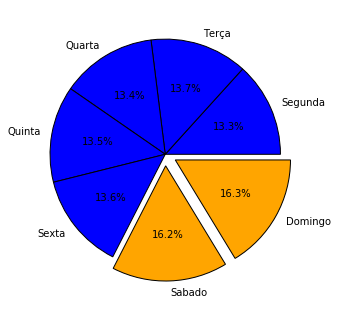

In [29]:
fig2 = plt.figure(figsize=(5,4))
eixos = fig2.add_axes([0, 0, 1, 1])

cor = ['b','b','b','b','b','orange','orange']
exp = [0,0,0,0,0,0.1,0.1]

eixos.pie(consumo, labels=consumo.index, explode=exp, autopct='%.1f%%', colors = cor, wedgeprops = {'edgecolor': 'k'})

plt.show()